# Projeto 1 - Turing Academy

Para análise, os dois datasets fornecidos foram juntados, porém na limpeza foram feitas todas as ações nos três datasets (contando o novo proveniente da concatenação) para que evitar algum problema na separação do novo dataset para a utilização dos modelos de predição.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [3]:
df = pd.concat([df_test, df_train]) #juntar os datasets
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1.0,24,NaN,1,0,77.0,NaN
1,74430,HR,region_4,Bachelor's,f,other,1.0,31,3.0,5,0,51.0,NaN
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1.0,31,1.0,4,0,47.0,NaN
3,38562,Procurement,region_2,Bachelor's,f,other,NaN,31,2.0,9,0,65.0,NaN
4,64486,Finance,region_29,Bachelor's,m,sourcing,1.0,30,4.0,7,0,61.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       71379 non-null  float64
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  awards_won?           78298 non-null  int64  
 11  avg_training_score    70840 non-null  float64
 12  is_promoted           54808 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 8.4+ MB


In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,78298.000000,71379.000000,78298.000000,72362.000000,78298.000000,78298.000000,70840.000000,54808.000000
mean,39149.500000,1.256672,201.898120,3.332219,5.848974,0.023053,63.430957,0.085170
std,22602.830026,0.610376,4538.125963,1.260982,4.248070,0.150073,13.465914,0.279137
min,1.000000,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000


## Dados Categóricos

In [ ]:
df.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,78189,78189,74746,78189,78189
unique,10,35,3,3,3
top,Sales & Marketing,region_2,Bachelor's,MALE,other
freq,24155,17568,52247,54791,43464


Verificando se as features assumem valores incoerentes.

In [ ]:
print(pd.Series(df.gender.unique()), end='\n\n')

0                                MALE
1                              FEMALE
2    eu sou homem hetero homossexual!
dtype: object



In [ ]:
print(pd.Series(df.education.unique()), end='\n\n')

0          Bachelor's
1    Master's & above
2                 NaN
3     Below Secondary
dtype: object



In [ ]:
print(pd.Series(df.recruitment_channel.unique()), end='\n\n')

0    sourcing
1       other
2    referred
dtype: object



In [ ]:
print(pd.Series(df.department.unique()), end='\n\n')

0            Technology
1                    HR
2     Sales & Marketing
3           Procurement
4               Finance
5             Analytics
6            Operations
7                 Legal
8                   R&D
9    quem trouxe quenga
dtype: object



In [ ]:
print(pd.Series(df.region.unique()), end='\n\n')

0                region_26
1                 region_4
2                region_13
3                 region_2
4                region_29
5                 region_7
6                region_22
7                region_16
8                region_17
9                region_24
10               region_11
11               region_27
12                region_9
13               region_20
14               region_34
15               region_23
16                region_8
17               region_14
18               region_31
19               region_19
20                region_5
21               region_28
22               region_15
23                region_3
24               region_25
25               region_12
26               region_21
27               region_30
28               region_10
29               region_33
30               region_32
31                region_6
32                region_1
33               region_18
34    casa da lu na suecia
dtype: object



### Dados faltantes e incorretos

In [4]:
df["gender"].replace("m","MALE",inplace = True)
df["gender"].replace("f","FEMALE",inplace = True)
df["gender"].replace("fEMALE","FEMALE",inplace = True)

df_test["gender"].replace("m","MALE",inplace = True)
df_test["gender"].replace("f","FEMALE",inplace = True)
df_test["gender"].replace("fEMALE","FEMALE",inplace = True)

df_train["gender"].replace("m","MALE",inplace = True)
df_train["gender"].replace("f","FEMALE",inplace = True)
df_train["gender"].replace("fEMALE","FEMALE",inplace = True)

Substituindo os valores "m" "f" para "MALE" e "FEMALE" respectivamente pois representam a mesma coisa. Além disso, foi corrigido a escrita de "FEMALE" para completamente maiúsculo.

Agora vamos retirar as linhas do dataset que contém os os seguintes valores em algumas das features: 'eu sou homem hetero homossexual!', 'casa da lu na suecia', 'quem trouxe quenga', pois são incoerentes com o cenário da pesquisa.

In [5]:
indexGender = df[ df['gender'] == 'eu sou homem hetero homossexual!'].index
df.drop(indexGender , inplace=True)

indexGender1 = df_test[ df_test['gender'] == 'eu sou homem hetero homossexual!'].index
df_test.drop(indexGender1 , inplace=True)

indexGender2 = df_train[ df_train['gender'] == 'eu sou homem hetero homossexual!'].index
df_train.drop(indexGender2 , inplace=True)

In [6]:
indexRegion = df[ df['region'] == 'casa da lu na suecia'].index
df.drop(indexRegion , inplace=True)

indexRegion1 = df_test[ df_test['region'] == 'casa da lu na suecia'].index
df_test.drop(indexRegion1 , inplace=True)

indexRegion2 = df_train[ df_train['region'] == 'casa da lu na suecia'].index
df_train.drop(indexRegion2 , inplace=True)

In [7]:
indexDep = df[ df['department'] == 'quem trouxe quenga'].index
df.drop(indexDep , inplace=True)

indexDep1 = df_test[ df_test['department'] == 'quem trouxe quenga'].index
df_test.drop(indexDep1 , inplace=True)

indexDep2 = df_train[ df_train['department'] == 'quem trouxe quenga'].index
df_train.drop(indexDep2 , inplace=True)

Agora podemos fazer uma pequena análise dos dados categóricos.

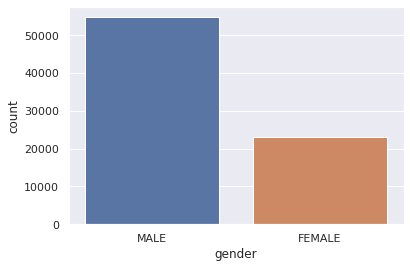

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x=df['gender']);

Vemos que a quantidade de homens na empresa ultaprassa o dobro do número de mulheres.

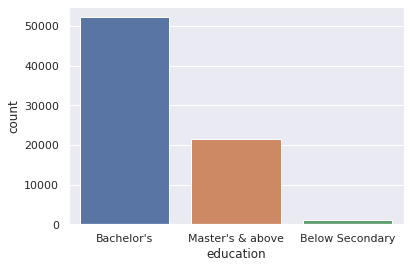

In [ ]:
sns.countplot(x=df['education']);

O gráfico acima nos mostra que a maioria dos funcionários apresentam um grau acadêmico de bacharelado, e que poucos tem um nível educacional abaixo do "secundário".

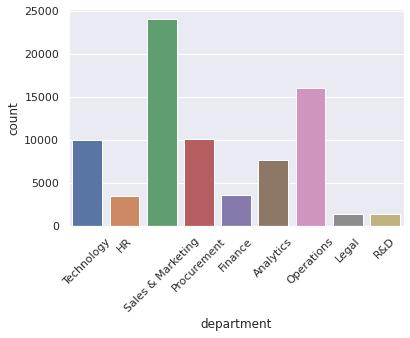

In [ ]:
sns.countplot(x=df['department']);
plt.xticks(rotation = 45);

Com o gráfico podemos observar a distribuição do número de pessoas em cada departamento da empresa. Vemos que o setor de vendas e marketing é o que possui a maior quantidade de funcionários, seguido pelo departamento de operações.

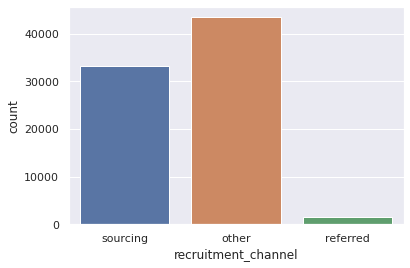

In [ ]:
sns.countplot(x=df['recruitment_channel']);

Observa-se que a pesquisa não consegue retratar muito bem o estudo dos canais de recrutamento dos funcionários, pois há apenas dois canais possíveis nessa feature e vemos que ambos aparecem menos que "others", um valor que ainda deixa as coisas em icógnita. Esse fator pode ser determinante na hora dos modelos de predição, visto que "others" representa a maioria e deve ser substituído para a predição.

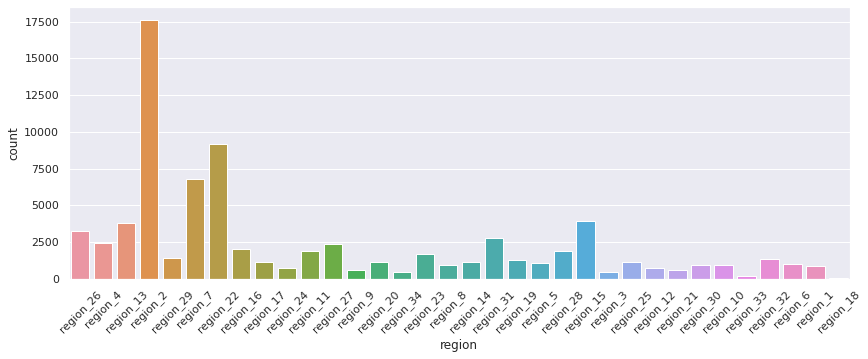

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(x=df['region']);
plt.xticks(rotation = 45);

Vemos que uma grande maioria dos funcionários vivem na região 2 do local de onde a pesquisa foi realizada.

Terminada a análise dessas features, terminaremos a limpeza para a utilização do dataset nos modelos de predição.

Substituiremos os valores faltantes na feature "education" pelas sua moda.

In [8]:
df["education"].fillna("Bachelor's", inplace = True)

df_test["education"].fillna("Bachelor's", inplace = True)

df_train["education"].fillna("Bachelor's", inplace = True)

In [ ]:
len(df[df['recruitment_channel'] == 'other'])

43292

In [9]:
df['recruitment_channel'].replace("other","sourcing", inplace=True)

df_test['recruitment_channel'].replace("other","sourcing", inplace=True)

df_train['recruitment_channel'].replace("other","sourcing", inplace=True)

Similarmente para a feature 'recruitment_channel' na qual lidamos com o valor "others" que não traz muita informação, e então substituimos pelo valor adequado que tinha mais contagens.

## Dados numéricos

In [10]:
df.set_index("employee_id", inplace=True)

In [ ]:
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,71015.000000,77920.000000,71998.000000,77920.000000,77920.000000,70465.000000,54546.000000
mean,1.257157,202.703144,3.332829,5.846111,0.022677,63.420492,0.085249
std,0.611124,4549.105516,1.261526,4.246099,0.148873,13.462672,0.279255
min,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [11]:
df_test.set_index("employee_id", inplace=True)

df_train.set_index("employee_id", inplace=True)

In [12]:
df = df[df['age'] > 0]
df = df[df['age'] <= 70]

df_test = df_test[df_test['age'] > 0]
df_test = df_test[df_test['age'] <= 70]

df_train = df_train[df_train['age'] > 0]
df_train = df_train[df_train['age'] <= 70]

Limitando o valor de idade para retirar do dataset os dados incoerrentes com a realidade.

Em seguida, substituiremos os valores faltantes nas features "no_of_trainings", "previous_year_rating" e "avg_training_score" pelas suas médias

In [13]:
df["no_of_trainings"].fillna(df["no_of_trainings"].mean(), inplace = True)

df_test["no_of_trainings"].fillna(df_test["no_of_trainings"].mean(), inplace = True)

df_train["no_of_trainings"].fillna(df_train["no_of_trainings"].mean(), inplace = True)

In [14]:
df["previous_year_rating"].fillna(df["previous_year_rating"].mean(), inplace = True)

df_test["previous_year_rating"].fillna(df_test["previous_year_rating"].mean(), inplace = True)

df_train["previous_year_rating"].fillna(df_train["previous_year_rating"].mean(), inplace = True)

In [15]:
df["avg_training_score"].fillna(df["avg_training_score"].mean(), inplace = True)

df_test["avg_training_score"].fillna(df_test["avg_training_score"].mean(), inplace = True)

df_train["avg_training_score"].fillna(df_train["avg_training_score"].mean(), inplace = True)

Agora faremos uma análise das features numéricas

In [ ]:
sns.set_theme(style="darkgrid")

Text(0.5, 0, 'age')

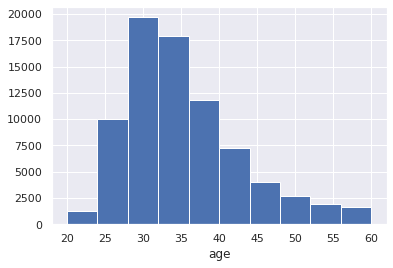

In [ ]:
df['age'].hist();
plt.xlabel("age")

Observa-se que a distruição de idade atinge seu pico entre os valores de 30 a 35 anos.

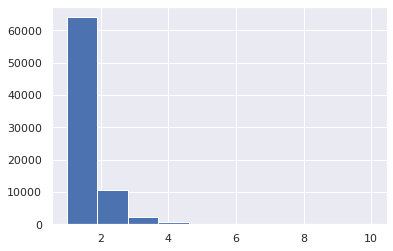

In [ ]:
df['no_of_trainings'].hist();
plt.xlabel("no_of_trainings")

Nesse gráfico vemos qua a feature "no_of_trainings" tem um enorme número de contagens para o valor igual a 1.

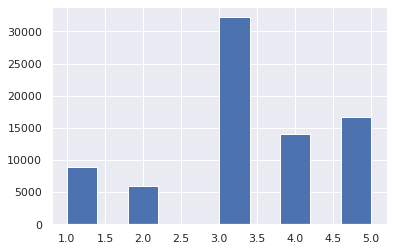

In [ ]:
df['previous_year_rating'].hist();
plt.xlabel("previous_year_rating")

Vemos que as avaliações do ano anterior se concentram em torno de valores acima de 3.

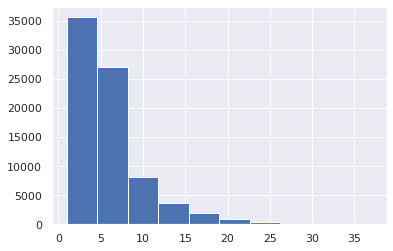

In [ ]:
df['length_of_service'].hist();
plt.xlabel("length_of_service")

O gráfica nos mostra um cenário que seria o esperado, no qual há um grande número de funcionários contratados pela empresa há poucos anos e uma pequena quantia com vários anos de serviço na empresa.

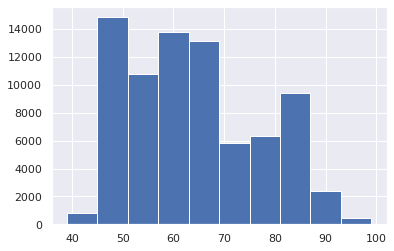

In [ ]:
df['avg_training_score'].hist();
plt.xlabel("avg_training_score")

Vemos que os valores de desempenho em treinamentos dos funcionários tem uma boa distribuição na faixa entre 45 e 70 e uma pequena queda no intervalo de 70 a 90.

### Relação entre features 

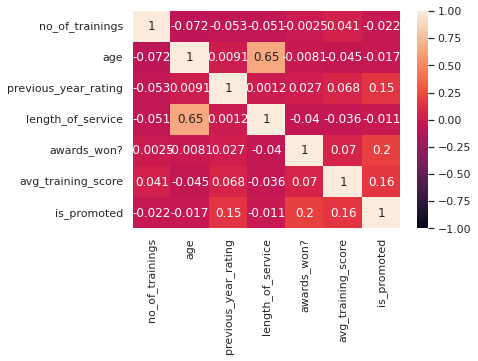

In [ ]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1);

O gráfico acima nos mostra que, em geral, as features não estabelecem uma correlação muito forte entre si.
Uma excessão é a relação entre 'age' e 'length_of_service' que será representada no gráfico a seguir.
Analisando diretamente nossa feture target, 'is_promoted', vemos que a feature que estabelece maior correlação é 'awards_won?' seguida de 'avg_training_score' e 'previous_year_rating', o que retrata que as promoções são baseados, em alguma proporção, em mérito.

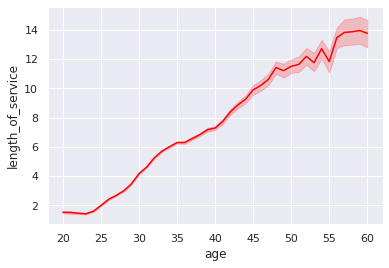

In [ ]:
sns.lineplot(x ='age', y='length_of_service', data=df, color='red',);

Esse cenário retratado é, de certa forma, esperado, pois é incoerente que um jovem ingressante no mercado de trabalho tenha passado vários anos em alguma instituição. Porém, além disso, ele nos mostra uma tendência de permanência dos funcionários na empresa, já que os funcionários mais velhos apresentam uma duração de prestação de serviços maior.

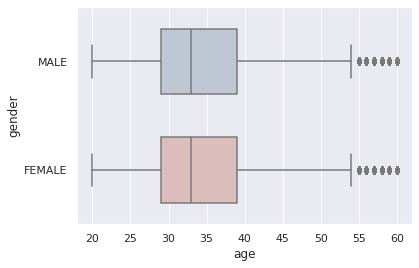

In [ ]:
sns.boxplot(x="age", y="gender", data=df, width=.6, palette="vlag");

Neste gráfico vemos claramente a situação já apresentada pelo histograma da feature 'age' que relatava a faixa de concentração dos valores, porém vemos claramente os outliers a partir dos 55 anos.

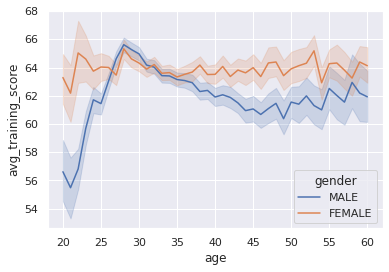

In [ ]:
sns.lineplot(x ='age', y='avg_training_score', data=df, color='red', hue = 'gender');

Observa-se que as mulheres apresentam um desempenho melhor nos treinamentos.

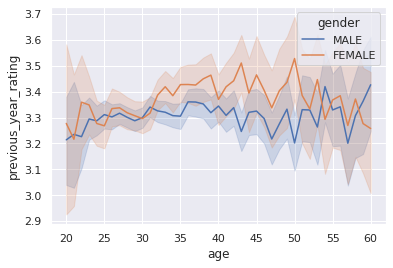

In [ ]:
sns.lineplot(x ='age', y='previous_year_rating', data=df, color='red', hue = 'gender');

Novamente vemos um melhor desempenho das mulheres na empresa, o que pode ser retratado pelas avaliações maiores em média para o gênero 'FEMALE'.

Vale ressaltar as grandes areas de sombreamento na porção final do gráfico que ocorrem devido ao baixo número de observções para esses valores de idade( o que já foi explicitado acima), de forma que não se haja uma tendência para essas baixas quantidades de dados.

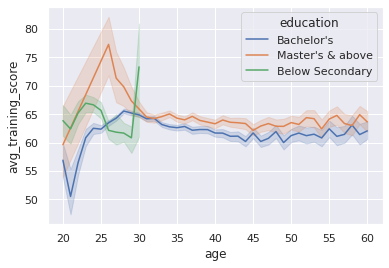

In [ ]:
sns.lineplot(x ='age', y='avg_training_score', data=df, color='red', hue = 'education');

Nota-se que os funcionários com maior nivel acadêmico apresentam um melhor desempenho em treinamentos na empresa.

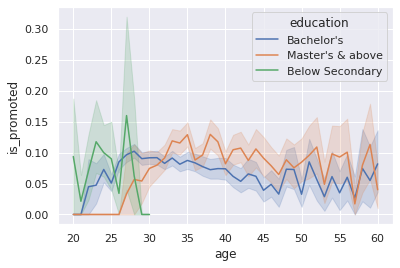

In [ ]:
sns.lineplot(x ='age', y='is_promoted', data=df, color='red', hue = 'education');

A partir de idades em que se torna possível alcançar determinados níveis altos acadêmicos, vemos que funcionários com tais classificações educacionais mais altos se aproximam mais da promoção do que os demais.

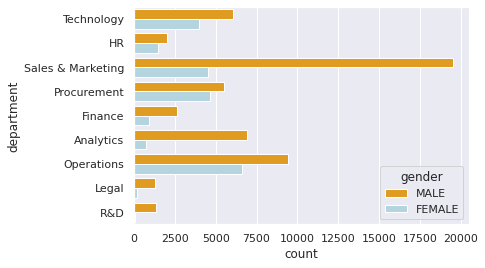

In [ ]:
sns.countplot(y="department", hue="gender", data= df, palette=('orange','lightblue'))

No gráfico acima vemos as distribuições dos gêneros nos departamentos da empresa. Uma comparação direta entre os gêneros não seria correta já que a quantidade é desproporcional entre eles, porém considerando a grande diferença conseguimos tirar muitas informações deste gráfico, tais como a grande presença de mulheres nos setores de operações, compras e tecnologia, além da grande proporção de homens em 'Analytics'.

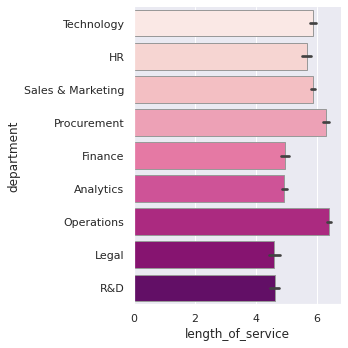

In [ ]:
sns.catplot(y="department",x='length_of_service',kind='bar', palette="RdPu", edgecolor=".6", data=df);

Podemos extrair do gráfico a extensão média de serviço para os funcionários de cada departamento, analisando, assim, quais setores há maior fluxo de funcionários(contratações e demissões) em uma análise simplificada, que neste caso são 'Legal' e 'R&D'.

## Modelos

In [ ]:
df_train.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
df_test.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54446 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54446 non-null  object 
 1   region                54446 non-null  object 
 2   education             54446 non-null  object 
 3   gender                54446 non-null  object 
 4   recruitment_channel   54446 non-null  object 
 5   no_of_trainings       54446 non-null  float64
 6   age                   54446 non-null  int64  
 7   previous_year_rating  54446 non-null  float64
 8   length_of_service     54446 non-null  int64  
 9   awards_won?           54446 non-null  int64  
 10  avg_training_score    54446 non-null  float64
 11  is_promoted           54446 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 5.4+ MB


Agora vamos iniciar a construção de diversos modelos para a predição da nossa feature target ('is_promoted') no dataset de teste.

Nossa feature target é categórica, podendo assumir apenas 1 ou 0.

Agora, vamos transformar nossas variáveis categóricas em números por meio de um Encoding.

In [16]:
one_hot_encoding_test = pd.get_dummies(df_test)
one_hot_encoding_train = pd.get_dummies(df_train)

In [17]:
X_test = pd.get_dummies(df_test)

X_train = pd.get_dummies(df_train)

X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

In [18]:
y_train = one_hot_encoding_train.iloc[:,-1]

Separamos nossa feature target nos dataset de treino e de teste.

### Regressão logística

In [19]:
 from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_test_predict = logreg.predict(X_test)

### Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    max_depth=3,
    min_samples_leaf=5
)

clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
y_predict = clf_model.predict(X_test)

### Random Forest

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(
    max_depth=25,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=42)

In [ ]:
predicted = rf.predict(X_test)

### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
K = 15
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_predict = model.predict(X_test)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_predict = model.predict(X_test)

### SVM

In [ ]:
from sklearn import svm

In [ ]:
model = svm.SVC(C = 1E9)
model.fit(X_train, y_train)

SVC(C=1000000000.0)

In [ ]:
y_predict = model.predict(X_test)

##Métricas 


Vamos transformar o dataset de treino em treino e teste, pois no dataset de teste dado não temos valores na feature target então não temos como avaliar nosso modelo dessa forma.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [23]:
data = df_train

In [24]:
y = data['is_promoted']
X = data.drop(['is_promoted'], axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [26]:
X_test = pd.get_dummies(X_test)
X_train = pd.get_dummies(X_train)

Faremos exemplos com KNN, primeiramente obtendo a acurácia com determinado valor de k. Em seguida usaremos a técnica de validação cruzada para diversos valores de k.

In [27]:
K = 15
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [28]:
y_predict = model.predict(X_test)

In [29]:
accuracy_score(y_test,y_predict)

0.9216867469879518

In [30]:
best_score = 0.0
best_k = 0
k_range = [5, 15, 20, 30]

for k in k_range:
    knn = KNeighborsClassifier(k)
    score = np.mean(cross_val_score(knn, X_train, y_train, cv = 10))
    
    print(f"Finished for K = {k} | Score: {score:.4f}")
    if score > best_score:
        best_k = k
        best_score = score

print("========================================")
print(f"Best acc: {best_score:.4f} | K = {best_k}")

Finished for K = 5 | Score: 0.9196
Finished for K = 15 | Score: 0.9220
Finished for K = 20 | Score: 0.9215
Finished for K = 30 | Score: 0.9212
Best acc: 0.9220 | K = 15


Nesse próximo exemplo usaremos um modelo de Random Forest para observarmos diferentes métricas.

In [ ]:
rf = RandomForestClassifier(
    max_depth=25,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


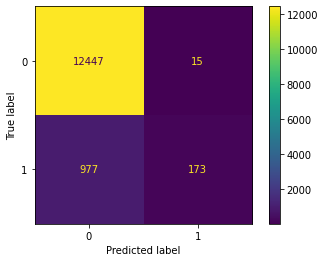

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test, values_format='d')

Na matriz de confusão acima vemos que há muitos "false negatives", representados no quadrante inferior esquerdo. 

In [ ]:
print("Acurácia:", rf.score(X_test, y_test))

Acurácia: 0.9271231266529533


In [ ]:
y_predict = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12462
           1       0.92      0.15      0.26      1150

    accuracy                           0.93     13612
   macro avg       0.92      0.57      0.61     13612
weighted avg       0.93      0.93      0.90     13612



Vemos que o recall dos casos promovidos é bem baixo, o que significa que dos casos promovidos, o modelo acertou poucos, logo não é considerado um modelo bom para prever a promoção de um funcionário( apesar da alta acurácia).
Esse fator também é responsável pelo baixo valor de f1 nos casos promovidos.
